# Predicting Bike Rentals

Objctive : To predict bike rental count on a daily basis based on environmental and seasonal settings. 

## Loading libraries and Data

In [188]:
#Load libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier

In [7]:
#Set working directory and Load Data
os.chdir(r"C:\Users\Ashish\Documents\Edwisor\Projects\Bike Rental")

In [8]:
#Load Data
data_df = pd.read_csv("day.csv")

In [14]:
#Explore data
data_df.head(10)
data_df.shape
data_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


## Feature Engineering and Variable Consolidation

In [33]:
data_df.season = data_df.season.astype('category')
data_df.yr = data_df.yr.astype('category')
data_df.mnth = data_df.mnth.astype('category')
data_df.holiday = data_df.holiday.astype('category')
data_df.weekday = data_df.weekday.astype('category')
data_df.workingday = data_df.workingday.astype('category')
data_df.weathersit = data_df.weathersit.astype('category')
data_df.dteday = pd.to_datetime(data_df['dteday'])
data_df['day'] = data_df.dteday.dt.day

## Exploratory Data Analysis

(array([ 13.,  62.,  71.,  73., 122., 137.,  81.,  76.,  79.,  17.]),
 array([  22. ,  891.2, 1760.4, 2629.6, 3498.8, 4368. , 5237.2, 6106.4,
        6975.6, 7844.8, 8714. ]),
 <a list of 10 Patch objects>)

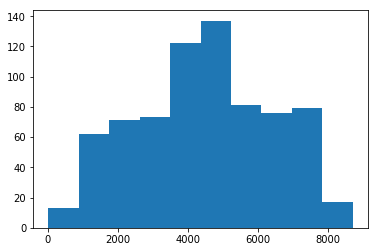

In [63]:
#Analysis on dependent variable - cnt
%matplotlib inline
plt.hist(data= data_df, x= 'cnt')

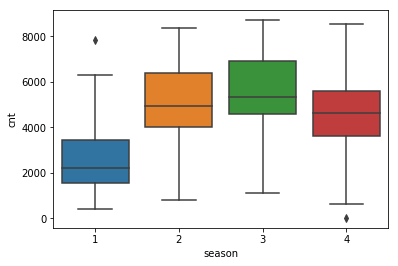

In [70]:
#Analysis of Independent variables on dependent variable - cnt
#Bike rental counts based on seasons
sns.boxplot(x='season', y = 'cnt', data= data_df)

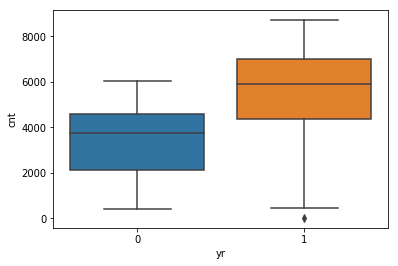

In [71]:
#Bike rental counts based on Year
sns.boxplot(x='yr', y= 'cnt', data=data_df)

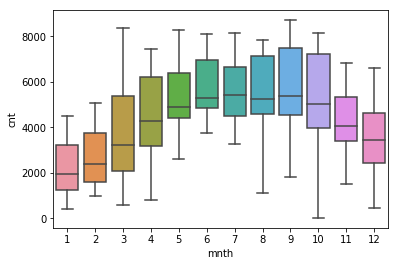

In [72]:
#Bike rental counts based on month
sns.boxplot(x ='mnth', y ='cnt', data=data_df)

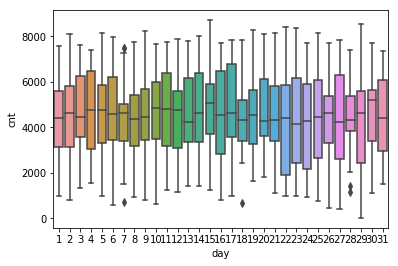

In [73]:
#Bike rental counts based on month
sns.boxplot(x ='day', y ='cnt', data=data_df)

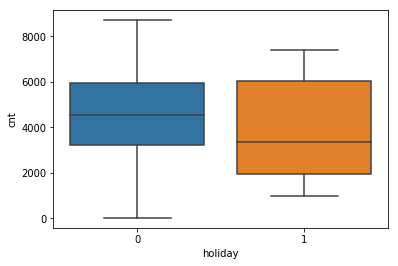

In [74]:
#Bike rental counts based on Holidays
sns.boxplot(x ='holiday', y ='cnt', data=data_df)

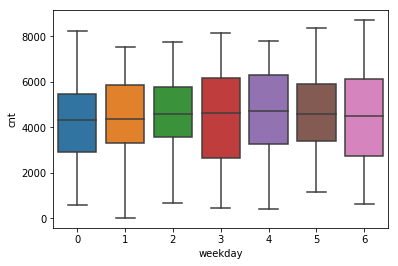

In [75]:
#Bike rental counts based on weekdays
sns.boxplot(x ='weekday', y ='cnt', data=data_df)

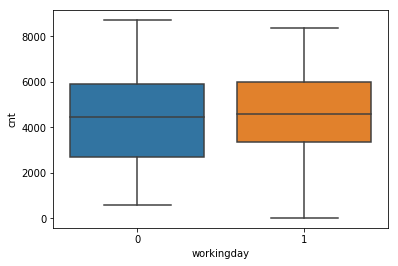

In [76]:
#Bike rental counts based on working days
sns.boxplot(x ='workingday', y ='cnt', data=data_df)

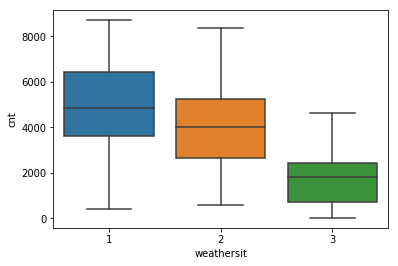

In [77]:
#Bike rental counts based on Weather conditions
sns.boxplot(x ='weathersit', y ='cnt', data=data_df)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


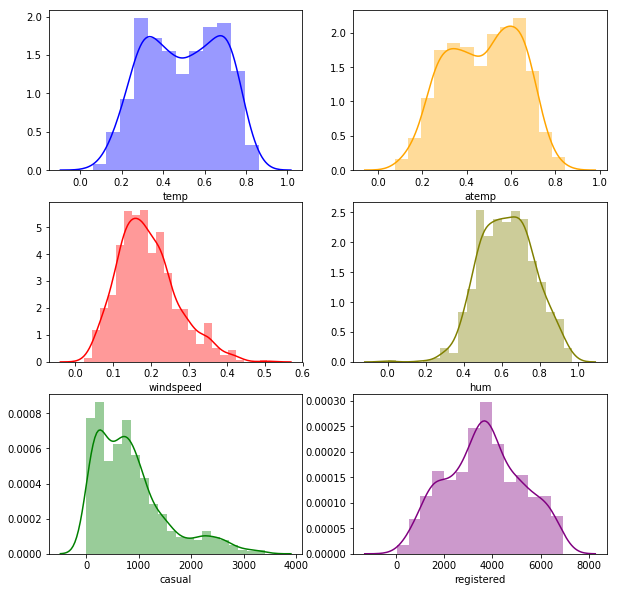

In [93]:
#Distribution of continuous variables
f, axes = plt.subplots(3,2, figsize = (10,10))
sns.distplot(data_df['temp'], color = "blue", ax=axes[0,0])
sns.distplot(data_df['atemp'], color = "orange", ax = axes[0,1])
sns.distplot(data_df['windspeed'], color ="red", ax= axes[1,0])
sns.distplot(data_df['hum'], color = "olive", ax = axes[1,1])
sns.distplot(data_df['casual'], color ="green", ax = axes[2,0])
sns.distplot(data_df['registered'], color = "purple", ax = axes[2,1])

## Missing Value Analysis

In [95]:
Missing_val = data_df.isnull().sum()

In [96]:
#There are no missing values in our dataset
Missing_val

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
day           0
dtype: int64

## Outlier Analysis

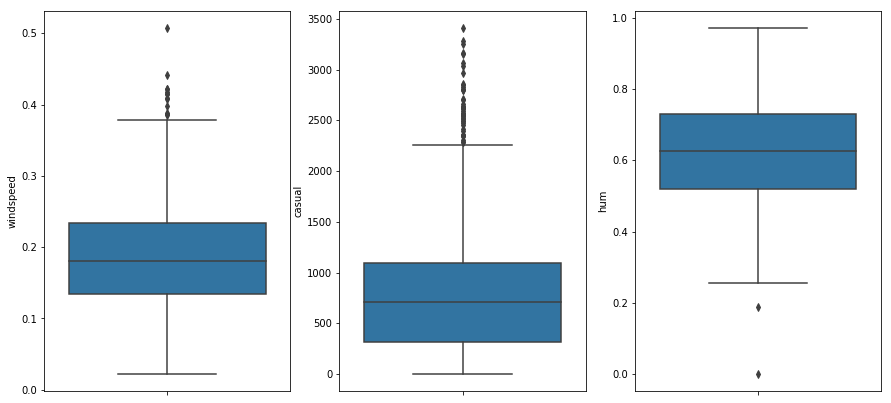

In [124]:
f, axes = plt.subplots(1,3, figsize = (15,7))
sns.boxplot(y = data_df["windspeed"], ax = axes[0])
sns.boxplot(y = data_df["casual"], ax = axes[1])
sns.boxplot(y = data_df["hum"], ax = axes[2])

## Feature Selection

In [126]:
#Correlation Analysis
num_cols = ["temp", "atemp", "hum", "windspeed", "casual", "registered"]

In [125]:
data_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'day'],
      dtype='object')

In [128]:
num_data = data_df.loc[:,num_cols]

In [130]:
corr_df = num_data.corr()

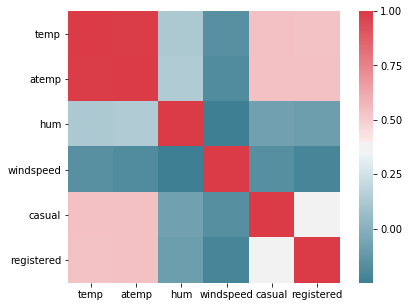

In [139]:
f, axes = plt.subplots(figsize = (7,5))
sns.heatmap(corr_df, mask = np.zeros_like(corr_df, dtype=np.bool),cmap=sns.diverging_palette(220, 10, as_cmap=True),square = True)

In [144]:
#Dummy Fields
catnames = ["season", "yr", "mnth","holiday", "weekday","workingday","weathersit"]
for i in catnames:
    dummies = pd.get_dummies(data_df[i], prefix= i, drop_first= False)
    data_df = pd.concat([data_df, dummies], axis= 1)

In [147]:
#Drop the below fields as they are redundant and variables not giving enough information
drop_fields = ["instant", "dteday","season", "yr", "mnth", "holiday", "weekday", "workingday", "weathersit", "atemp", "casual", "registered"]
data_df = data_df.drop(drop_fields, axis=1)

In [148]:
data_df.head()

,temp,hum,windspeed,cnt,day,season_1,season_2,season_3,season_4,yr_0,...,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_0,workingday_1,weathersit_1,weathersit_2,weathersit_3
0,0.344167,0.805833,0.160446,985,1,1,0,0,0,1,...,0,0,0,0,1,1,0,0,1,0
1,0.363478,0.696087,0.248539,801,2,1,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
2,0.196364,0.437273,0.248309,1349,3,1,0,0,0,1,...,0,0,0,0,0,0,1,1,0,0
3,0.200000,0.590435,0.160296,1562,4,1,0,0,0,1,...,1,0,0,0,0,0,1,1,0,0
4,0.226957,0.436957,0.186900,1600,5,1,0,0,0,1,...,0,1,0,0,0,0,1,1,0,0


## Model Development

In [149]:
#Data Splitting into train and test
train, test = train_test_split(data_df, test_size = 0.2)

In [151]:
train.shape

(584, 37)

In [152]:
test.shape

(147, 37)

### Linear Regression

In [153]:
import statsmodels.api as sm

In [161]:
model_lm = sm.OLS(train.iloc[:,3], train.iloc[:,train.columns != 'cnt']).fit()

In [163]:
model_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     115.4
Date:                Mon, 14 Jan 2019   Prob (F-statistic):          6.15e-211
Time:                        16:01:44   Log-Likelihood:                -4689.0
No. Observations:                 584   AIC:                             9436.
Df Residuals:                     555   BIC:                             9563.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
temp          4835.9024    454.530     10.639      0.000    3943.092    5728.713
hum          -1485.0890    323.831     -4.586      0.000   -2121.173    -849.005
windspeed    -2515.7875    434.374     -5.792      0.000   -3369.005   -1662.570
day             -8.4797      3.672     -2.309      0.021     -15.692      -1.267
season_1      -582.4726    133.886     -4.351      0.000    -845.457    -319.488
season_2       321.9315    132.345      2.433      0.015      61.973     581.890
season_3       376.3653    136.016      2.767      0.006     109.197     643.534
season_4      1023.6789    137.190      7.462      0.000     754.204    1293.154
yr_0          -421.8349     76.856     -5.489      0.000    -572.800    -270.870
yr_1          1561.3380     76.061     20.527      0.000    1411.936    1710.740
mnth_1        -181.7379    191.646     -0.948      0.343    -558.177     194.701
mnth_2          40.2464    182.605      0.220      0.826    -318.435     398.928
mnth_3         318.8853    141.605      2.252      0.025      40.738     597.032
mnth_4         236.2892    167.752      1.409      0.160     -93.217     565.796
mnth_5         481.8357    179.725      2.681      0.008     128.812     834.860
mnth_6         200.2928    167.984      1.192      0.234    -129.670     530.255
mnth_7        -442.0363    201.298     -2.196      0.029    -837.436     -46.637
mnth_8           4.4338    188.347      0.024      0.981    -365.527     374.395
mnth_9         751.4725    147.031      5.111      0.000     462.668    1040.277
mnth_10        246.0425    168.428      1.461      0.145     -84.792     576.877
mnth_11       -306.7394    178.586     -1.718      0.086    -657.526      44.047
mnth_12       -209.4813    156.334     -1.340      0.181    -516.560      97.597
holiday_0      901.1191     94.066      9.580      0.000     716.350    1085.888
holiday_1      238.3840    113.059      2.108      0.035      16.307     460.460
weekday_0     -109.7643     68.475     -1.603      0.110    -244.267      24.738
weekday_1       60.9461     78.493      0.776      0.438     -93.234     215.126
weekday_2      110.5135     83.779      1.319      0.188     -54.049     275.076
weekday_3      241.8168     83.293      2.903      0.004      78.209     405.424
weekday_4      163.6703     81.408      2.010      0.045       3.764     323.577
weekday_5      295.7924     81.632      3.624      0.000     135.448     456.137
weekday_6      376.5283     68.359      5.508      0.000     242.255     510.802
workingday_0   505.1480     88.048      5.737      0.000     332.200     678.096
workingday_1   634.3551     63.693      9.960      0.000     509.247     759.464
weathersit_1  1279.7155     75.139     17.031      0.000    1132.125    1427.306
weathersit_2   793.8895     81.096      9.789      0.000     634.596     953.183
weath

In [171]:
#Predict the model
predict_lm = model_lm.predict(test.iloc[:,test.columns != 'cnt'])

In [178]:
def mape(y_actual, y_pred):
    mape = np.mean(np.abs(y_actual - y_pred)/y_actual)*100
    return mape

In [186]:
mape(test.iloc[:,3], predict_lm)

17.864234289713636

In [187]:
#Error rate : 17.86 and Accuracy : 82.14

### Decision Tree

In [183]:
#Decision Tree regression
model_dt = DecisionTreeRegressor(max_depth= 2).fit(train.iloc[:,train.columns != 'cnt'], train.iloc[:,3])

In [184]:
#Predict on Test data
predict_dt = model_dt.predict(test.iloc[:,test.columns != 'cnt'])

In [185]:
mape(test.iloc[:,3], predict_dt)

24.559021452544382

In [ ]:
#Error Rate : 24.55 and Accuracy : 75.45 %

### Random Forest

In [189]:
#Random Forest 
model_rf = RandomForestClassifier(n_estimators=100).fit(train.iloc[:,train.columns != 'cnt'], train.iloc[:,3])

In [190]:
predict_rf = model_rf.predict(test.iloc[:,test.columns != 'cnt'])

In [191]:
mape(test.iloc[:,3], predict_rf)

24.511537456953462

In [ ]:
#Error Rate : 24.51 and Accuracy : 75.49 %

# Conclusion

Linear Regression model gives better prediction result of 82.14% accuracy and MAPE result of 17.86%. The model can further be improved by applying regression fitting models and regularization methods.